# Support Vector Regression with Stochastic Gradient Descent (LOB Data)

# References

* http://leon.bottou.org/publications/pdf/compstat-2010.pdf
* http://research.microsoft.com/pubs/192769/tricks-2012.pdf
* http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1257413&tag=1
* http://www.sciencedirect.com/science/article/pii/S0305048301000263
* http://link.springer.com/book/10.1007/978-3-642-35289-8

In [49]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information deap, matplotlib, numpy, pandas, seaborn, sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.1.2
OS Linux 3.13.0 86 generic x86_64 with debian jessie sid
deap 1.0
matplotlib 1.5.1
numpy 1.10.4
pandas 0.18.0
seaborn 0.7.0
sklearn 0.17.1
Fri May 27 22:21:21 2016 BST

In [32]:
from deap import base, creator, tools, algorithms
from IPython.display import display
from ipywidgets import widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import random
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing as preproc
from sklearn import svm
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as mse, accuracy_score as acc_scr, mean_absolute_error as mae

np.set_printoptions(threshold=np.nan)
sns.set()
sns.set_context("notebook", font_scale=1.35)
toolb = base.Toolbox()

In [33]:
path = '../btc-data/BTC_LOB_techind_10s.csv'
data10s = pd.read_csv(path, index_col = 0, parse_dates = True)

path = '../btc-data/BTC_LOB_techind_30s.csv'
data30s = pd.read_csv(path, index_col = 0, parse_dates = True)

path = '../btc-data/BTC_LOB_techind_60s.csv'
data1m = pd.read_csv(path, index_col = 0, parse_dates = True)

path = '../btc-data/BTC_LOB_techind_300s.csv'
data5m = pd.read_csv(path, index_col = 0, parse_dates = True)

path = '../btc-data/BTC_LOB_techind_600s.csv'
data10m = pd.read_csv(path, index_col = 0, parse_dates = True)

In [34]:
data10s

,mid price,B-ASPREAD,K360,K180,K60,D360,D180,D60,sD360,sD180,...,DISP60,OSCP180-360,OSCP60-180,RSI360,RSI180,RSI60,CCI360,CCI180,CCI60,DELTAP
2016-01-01 02:59:40,430.305,0.53,0.000000,0.000000,0.000000,61.295468,34.942988,18.297894,45.643462,55.378159,...,99.943676,0.000199,-0.000725,49.069940,47.401247,41.388401,0.654694,-1.475509,-0.531521,0.000
2016-01-01 02:59:50,430.305,0.53,0.000000,0.000000,0.000000,61.178695,34.452537,17.479712,45.747607,55.188824,...,99.947062,0.000193,-0.000751,49.069940,46.568110,42.166517,0.653150,-1.471843,-0.506070,0.000
2016-01-01 03:00:00,430.305,0.53,0.000000,0.000000,0.000000,61.061923,33.975106,16.510015,45.851132,54.996227,...,99.950544,0.000186,-0.000778,49.069940,46.641988,41.906475,0.651610,-1.468691,-0.480539,0.000
2016-01-01 03:00:10,430.305,0.53,0.000000,0.000000,0.000000,60.945150,33.510697,15.419106,45.954035,54.800515,...,99.954104,0.000180,-0.000805,49.069940,46.716102,41.696751,0.650072,-1.466055,-0.454877,0.000
2016-01-01 03:00:20,430.305,0.53,0.000000,0.000000,0.000000,60.827787,33.146113,14.206984,46.056313,54.602805,...,99.957742,0.000175,-0.000835,49.050986,47.292225,41.485507,0.648566,-1.467540,-0.429076,0.000
2016-01-01 03:00:30,430.305,0.53,0.000000,0.000000,0.000000,60.711014,32.850975,12.903954,46.158406,54.403860,...,99.961438,0.000171,-0.000867,49.069248,47.701460,41.326067,0.647034,-1.472187,-0.403154,0.000
2016-01-01 03:00:40,430.310,0.54,0.000000,0.000000,0.000000,60.613704,32.538475,11.419106,46.260535,54.203146,...,99.965250,0.000166,-0.000899,49.679608,47.588076,41.004566,0.644613,-1.476047,-0.377549,0.005
2016-01-01 03:00:50,430.305,0.53,0.369004,0.369004,0.414938,60.494641,32.219344,9.850264,46.362579,54.000919,...,99.970263,0.000162,-0.000932,49.065242,47.559653,40.896615,0.652030,-1.469277,-0.338602,-0.005
2016-01-01 03:01:00,430.305,0.53,0.000000,0.000000,0.000000,60.374554,31.893823,8.183597,46.464510,53.797119,...,99.973050,0.000157,-0.000965,49.046529,47.505423,40.642202,0.640786,-1.483000,-0.332817,0.000
2016-01-01 03:01:10,430.305,0.53,0.000000,0.000000,0.000000,60.220923,31.559622,8.183597,46.566142,53.591649,...,99.974366,0.000153,-0.000973,49.046529,47.448426,46.436059,0.636933,-1.485904,-0.308881,0.000


In [35]:
data30s

,mid price,B-ASPREAD,K360,K180,K60,D360,D180,D60,sD360,sD180,...,DISP60,OSCP180-360,OSCP60-180,RSI360,RSI180,RSI60,CCI360,CCI180,CCI60,DELTAP
2016-01-01 08:59:00,433.805,0.75,55.862726,48.268156,50.000000,59.314645,53.892303,80.335556,73.952213,66.199069,...,99.988818,0.000376,-0.000461,48.543689,44.399799,54.328358,0.058659,-0.188518,1.015588,0.125
2016-01-01 08:59:30,433.355,1.47,58.245949,51.061453,70.161290,59.236089,53.620422,79.924971,73.885263,66.188861,...,100.016908,0.000356,-0.000427,48.692265,44.746693,52.923077,0.143537,-0.040078,1.160289,-0.450
2016-01-01 09:00:00,433.655,1.05,49.666349,41.005587,0.000000,59.136247,53.317976,78.431759,73.817585,66.176271,...,99.913713,0.000337,-0.000403,48.262548,44.271605,47.977685,-0.157779,-0.541918,0.483324,0.300
2016-01-01 09:00:30,433.675,0.91,55.386082,47.709497,47.244094,59.052293,53.041470,77.578889,73.749221,66.161379,...,99.983035,0.000318,-0.000377,48.602740,44.803130,49.457995,0.045071,-0.194077,0.900046,0.020
2016-01-01 09:01:00,433.755,0.83,55.767398,48.156425,50.393701,58.968379,52.767447,76.763429,73.680171,66.144222,...,99.987800,0.000299,-0.000352,48.602740,44.857073,49.457995,0.059491,-0.164065,0.910007,0.080
2016-01-01 09:01:30,433.820,0.70,57.292660,49.944134,62.992126,58.888194,52.503355,76.199422,73.610442,66.124865,...,100.005879,0.000281,-0.000322,48.681475,45.071794,51.278600,0.114191,-0.065291,1.020682,0.065
2016-01-01 09:02:00,433.820,0.70,58.531935,51.396648,73.228346,58.811705,52.247333,75.787164,73.540045,66.103348,...,100.020347,0.000263,-0.000292,48.759698,45.245027,51.797603,0.158676,0.016631,1.117046,0.000
2016-01-01 09:02:30,433.840,0.68,58.531935,51.396648,73.228346,58.734962,51.991311,75.353790,73.468980,66.079675,...,100.019943,0.000245,-0.000263,48.754098,45.245027,51.409396,0.159400,0.023839,1.097442,0.020
2016-01-01 09:03:00,433.810,0.66,58.913251,51.843575,76.377953,58.659532,51.737772,75.037013,73.397243,66.053855,...,100.023786,0.000227,-0.000230,48.781820,45.298110,52.724796,0.173551,0.054326,1.121409,-0.030
2016-01-01 09:03:30,433.470,1.42,58.341277,51.173184,71.653543,58.586079,51.481047,74.581666,73.324852,66.025799,...,100.016485,0.000209,-0.000201,48.824494,45.243282,51.377410,0.153931,0.026644,1.055581,-0.340


In [36]:
data1m

,mid price,B-ASPREAD,K360,K180,K60,D360,D180,D60,sD360,sD180,...,DISP60,OSCP180-360,OSCP60-180,RSI360,RSI180,RSI60,CCI360,CCI180,CCI60,DELTAP
2016-01-01 17:58:00,433.890,0.22,64.327062,44.792833,6.451613,50.498032,69.982094,46.163657,35.312059,55.487711,...,99.823031,0.001397,0.000716,49.696396,50.951675,49.002904,-0.383073,0.939306,-1.208706,1.670
2016-01-01 17:59:00,433.630,0.28,88.494935,82.194849,96.236559,50.628973,70.186470,47.142260,35.332907,55.633581,...,100.204328,0.001435,0.000715,50.409679,52.037307,52.074236,0.203981,1.898439,1.175688,-0.260
2016-01-01 18:00:00,432.145,0.21,84.732272,76.371781,82.258065,50.743360,70.347422,47.866137,35.354415,55.781067,...,100.141045,0.001471,0.000708,50.250170,51.815642,51.516245,0.116863,1.733000,0.783942,-1.485
2016-01-01 18:01:00,433.675,0.65,63.241679,42.272727,2.419355,50.789295,70.346857,47.286765,35.376364,55.929617,...,99.800677,0.001503,0.000657,49.555518,51.104861,48.851166,-0.400494,0.890837,-1.289925,1.530
2016-01-01 18:02:00,433.675,0.65,85.383502,76.318875,84.677419,50.888511,70.529180,48.114155,35.398882,56.080393,...,100.150473,0.001544,0.000649,50.130581,51.913524,51.501796,0.142640,1.873634,0.840205,0.000
2016-01-01 18:03:00,433.465,0.57,85.383502,74.686717,84.677419,50.979768,70.689436,48.539308,35.421925,56.233382,...,100.150126,0.001585,0.000611,50.068485,51.840127,50.151007,0.147217,2.023096,0.866134,-0.210
2016-01-01 18:04:00,433.545,0.89,82.344428,69.423559,73.387097,51.060726,70.706374,48.941719,35.445450,56.387453,...,100.101091,0.001610,0.000592,49.966844,51.085590,50.235294,0.077353,1.873498,0.586303,0.080
2016-01-01 18:05:00,432.270,0.50,83.502171,71.428571,77.688172,51.148083,70.732491,49.371623,35.469191,56.542569,...,100.118987,0.001636,0.000570,50.024863,51.206266,50.252016,0.110409,1.901553,0.721374,-1.275
2016-01-01 18:06:00,432.190,0.32,65.050651,39.473684,9.139785,51.200901,70.582601,48.630645,35.493001,56.697361,...,99.829046,0.001653,0.000514,49.629995,50.479035,48.112294,-0.340857,1.123633,-1.095682,-0.080
2016-01-01 18:07:00,433.375,0.65,63.892909,37.468672,4.838710,51.255278,70.430687,47.808512,35.516962,56.851756,...,99.815430,0.001670,0.000455,49.634076,50.484726,47.963291,-0.365422,1.067191,-1.177617,1.185


In [37]:
data5m

,mid price,B-ASPREAD,K360,K180,K60,D360,D180,D60,sD360,sD180,...,DISP60,OSCP180-360,OSCP60-180,RSI360,RSI180,RSI60,CCI360,CCI180,CCI60,DELTAP
2016-01-04 17:50:00,433.490,0.72,90.944499,78.397213,77.372263,56.743089,85.371437,59.399938,39.243672,70.720565,...,100.319711,0.004104,0.001746,51.694725,54.633716,53.820598,1.898546,2.361261,1.188853,-0.340
2016-01-04 17:55:00,434.060,0.08,87.633885,70.499419,69.099757,56.926382,85.238712,58.979721,39.273027,70.971626,...,100.237052,0.004114,0.001757,51.356694,52.915489,53.114754,1.762655,2.224294,1.005724,0.570
2016-01-04 18:00:00,432.875,0.55,93.184031,83.739837,82.968370,57.125644,85.148378,59.181642,39.303316,71.219792,...,100.360694,0.004119,0.001810,51.609154,52.848875,56.261128,2.011598,2.327185,1.213850,-1.185
2016-01-04 18:05:00,433.020,0.34,81.645570,56.213705,54.136253,57.293957,84.905876,59.376962,39.334459,71.464207,...,100.080824,0.004117,0.001855,51.077195,51.298377,54.373387,1.515463,1.978535,0.670609,0.145
2016-01-04 18:10:00,432.780,0.44,83.057449,59.581882,57.664234,57.476399,84.681331,59.488902,39.366519,71.704887,...,100.108600,0.004114,0.001897,51.223614,51.461988,54.281609,1.586453,1.981865,0.708629,-0.240
2016-01-04 18:15:00,432.795,0.41,80.720545,54.006969,51.824818,57.649867,84.425814,59.373186,39.399471,71.941690,...,100.048933,0.004110,0.001927,51.095600,51.156463,53.104435,1.492640,1.888289,0.579870,0.015
2016-01-04 18:20:00,433.065,0.25,80.866602,54.355401,52.189781,57.822637,84.172610,59.871767,39.433307,72.174644,...,100.045192,0.004107,0.001987,51.093439,51.180908,55.592105,1.508988,1.861848,0.561801,0.270
2016-01-04 18:25:00,433.010,0.02,83.495618,60.627178,58.759124,57.989470,83.954250,60.365304,39.467970,72.404108,...,100.099912,0.004106,0.002047,51.106400,51.504729,55.921638,1.637370,1.899151,0.657114,-0.055
2016-01-04 18:30:00,433.590,0.14,82.960078,59.349593,57.420925,58.166952,83.728414,60.824689,39.503439,72.629886,...,100.079777,0.004102,0.002108,51.180998,51.279842,55.700326,1.623114,1.855127,0.606907,0.580
2016-01-04 18:35:00,433.760,0.56,88.607595,72.822300,71.532847,58.343847,83.584112,61.574565,39.539664,72.852672,...,100.203891,0.004105,0.002185,51.303772,52.079280,57.401552,1.888167,1.966404,0.844467,0.170


In [38]:
data10m

,mid price,B-ASPREAD,K360,K180,K60,D360,D180,D60,sD360,sD180,...,DISP60,OSCP180-360,OSCP60-180,RSI360,RSI180,RSI60,CCI360,CCI180,CCI60,DELTAP
2016-01-08 11:40:00,454.460,0.54,76.750204,63.195343,36.960179,71.388015,87.945768,28.808812,67.167271,79.685439,...,99.810040,0.024502,0.004456,55.762445,55.634688,40.847185,1.266263,1.569352,-1.920516,-0.385
2016-01-08 11:50:00,454.430,0.48,75.701444,61.376921,32.641615,71.401374,87.810912,29.139863,67.193589,79.867975,...,99.723113,0.024535,0.004306,55.606402,55.424618,50.895243,1.242570,1.544214,-1.994630,-0.030
2016-01-08 12:00:00,454.740,0.12,75.619722,58.245860,32.305104,71.409551,87.655318,28.858212,67.219561,80.048464,...,99.728803,0.024568,0.004011,55.555834,55.379759,44.969353,1.234163,1.694912,-1.907257,0.310
2016-01-08 12:10:00,455.250,0.46,76.464179,58.935361,35.782389,71.419552,87.445131,28.528406,67.245185,80.226287,...,99.810544,0.024583,0.003719,55.620252,54.916804,44.320073,1.240270,1.759754,-1.714302,0.510
2016-01-08 12:20:00,455.345,0.23,77.853446,51.024096,41.503085,71.451018,87.177090,28.293946,67.270556,80.400674,...,99.934347,0.024592,0.003443,55.921267,54.956615,45.166096,1.254839,2.218854,-1.468161,0.095
2016-01-08 12:30:00,454.800,0.40,78.112231,51.596386,42.568704,71.494157,86.908181,28.048445,67.295765,80.571364,...,99.967416,0.024531,0.003233,56.059923,52.908120,45.010457,1.251697,2.195991,-1.383188,-0.545
2016-01-08 12:40:00,455.425,0.83,76.627622,48.313253,43.449198,71.537867,86.638531,27.547799,67.320833,80.738352,...,99.868467,0.024473,0.002936,55.957590,52.963395,41.212967,1.221447,2.116711,-2.032108,0.625
2016-01-08 12:50:00,455.910,0.14,78.330155,52.078313,51.804813,71.585785,86.372300,27.633586,67.345788,80.901570,...,100.013359,0.024408,0.002774,56.090447,52.845921,46.506185,1.241040,2.145461,-1.724794,0.485
2016-01-08 13:00:00,455.375,0.25,79.651321,55.000000,58.288770,71.641806,86.122300,27.666760,67.370644,81.061015,...,100.129634,0.024344,0.002585,56.243933,53.021912,45.457644,1.254555,2.160456,-1.495674,-0.535
2016-01-08 13:10:00,455.535,0.13,78.193953,51.777108,51.794177,71.665741,85.857338,27.522721,67.395239,81.217214,...,100.025517,0.024285,0.002364,55.858936,52.843772,43.787183,1.224720,2.082784,-1.657550,0.160


In [39]:
def accuracy(act, pred):
    act_ticks = list(map(lambda x: 1 if x >= 0 else 0, act.values))
    pred_ticks = list(map(lambda x: 1 if x >= 0 else 0, pred))
    d = list(map(lambda t: t[0] == t[1], zip(act_ticks, pred_ticks)))
    
    return np.sum(d) / len(act_ticks)

In [40]:
def fitness_fun(model):
    method, indiv, dataset = model
    
    X_train, X_valid, y_train, y_valid = dataset
    
    # Sometimes the GA assigns the value 0 or less
    # to the parameters, causing the model to fail.
    # The lines below prevent this.
    if indiv[0] <= 0:
        indiv[0] = 0.0001
        
    if indiv[1] <= 0:
        indiv[1] = 0.002
        
    method.alpha = indiv[0]
    method.eta0 = indiv[1]
    
    method.fit(X_train, y_train)
    
    pred = method.predict(X_valid)
    rmse = np.sqrt(mse(y_valid, pred))
    r2 = method.score(X_valid, y_valid)
    dir_sym = accuracy(y_valid, pred)
    
    return dir_sym, rmse

def nsga2_feat_sel(method, gen_num, indiv_num, dataset):
    # GA configuration
    creator.create("FitnessMulti", base.Fitness, weights = (1.0, -1.0))
    creator.create("Individual", list, fitness=creator.FitnessMulti)
    toolb.register('alpha', random.uniform, 1e-8, 0.01)
    toolb.register('eta0', random.uniform, 0.0001, 0.01)
    toolb.register('individual', tools.initCycle, creator.Individual, 
                   (toolb.alpha, toolb.eta0), n = 1)
    toolb.register('population', tools.initRepeat, list, toolb.individual, n = indiv_num)
    toolb.register('evaluate', fitness_fun)
    toolb.register('mate', tools.cxUniform, indpb = 0.1)
    toolb.register('mutate', tools.mutGaussian, mu = 0.0001, sigma = 0.001, indpb = 0.1)
    toolb.register('select', tools.selNSGA2)
    
    # Initialise the population and the fitness function
    population = toolb.population()
    fits = map (toolb.evaluate, map(lambda x: (method, x, dataset), population))
    
    # Initialize the placeholder
    # for the best individuals
    hof = tools.HallOfFame(1)
    
    # Run the fitness function on the population
    for fit, ind in zip(fits, population):
        ind.fitness.values = fit

    best = np.ndarray((gen_num, 2))

    # Start the evolution
    for gen in range(gen_num):
        offspring = algorithms.varOr(population, toolb, lambda_ = indiv_num, cxpb = 0.55, mutpb = 0.15)
        hof.update(offspring)

        fits = map (toolb.evaluate, map(lambda x: (method, x, dataset), offspring))

        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        population = toolb.select(offspring + population, k = indiv_num)

        best[gen] = (hof[0].fitness.values)

    chromosome = hof[0]
    
    return best, method, chromosome

In [41]:
def feature_selection(gen_num, indiv_num, model, dataset):
    results = nsga2_feat_sel(model, gen_num, indiv_num, dataset)
    
    best_model = results[1]
    chromosome = results[2]

    print ('Scores', results[0], '\n')
    print ('Chromosome: ', chromosome, '\n')
    
    # Create dataframes from the metrics
    results_df = pd.DataFrame(results[0], columns = ['Accuracy', 'RMSE'])
    results_df.insert(0, 'Generation', results_df.index)
    
    # Plot the best individuals of each generation based on the metrics
    g = sns.PairGrid(results_df, y_vars=['Accuracy', 'RMSE'], x_vars = 'Generation', size=7, aspect = 2.5)
    g.map(plt.plot)
    
    return best_model, chromosome

In [42]:
def evaluate(data, features):
    X, y = data[features], data['DELTAP'].copy()
    
    calib_dates = X.index[:int(0.2*len(X))]
    valid_dates = X.index[int(0.2*len(X)):int(0.3*len(X))]
    train_dates = X.index[int(0.3*len(X)):int(0.7*len(X))]
    test_dates = X.index[int(0.7*len(X)):]
    
    X_calib = X[calib_dates[0]:calib_dates[-1]]
    y_calib = y[calib_dates[0]:calib_dates[-1]]
    
    X_valid = X[valid_dates[0]:valid_dates[-1]]
    y_valid = y[valid_dates[0]:valid_dates[-1]]

    X_train = X[train_dates[0]:train_dates[-1]]
    y_train = y[train_dates[0]:train_dates[-1]]
    
    X_test = X[test_dates[0]:test_dates[-1]]
    y_test = y[test_dates[0]:test_dates[-1]]
    
    scaler = preproc.StandardScaler()
    for df in X_calib.columns.tolist():
        scaler.fit(X_calib[df].reshape(-1,1))
        X_calib[df] = scaler.transform(X_calib[df].reshape(-1,1))
        X_valid[df] = scaler.transform(X_valid[df].reshape(-1,1))
        X_train[df] = scaler.transform(X_train[df].reshape(-1,1))
        X_test[df] = scaler.transform(X_test[df].reshape(-1,1))
        
    sgd = linear_model.SGDRegressor(shuffle = True, penalty = 'l2', epsilon = 0,
                                    loss = 'epsilon_insensitive',
                                    n_iter = np.ceil(10**6 / len(X_train)))
    
    dataset = X_calib, X_valid, y_calib, y_valid
    
    model = feature_selection(30, 15, sgd, dataset)
    best_model, chromosome = model
    
    best_model.alpha = chromosome[0]
    best_model.eta0 = chromosome[1]
    best_model.fit(X_train, y_train)
    
    pred = []
    
    # Testing and online learning
    for i in range(len(X_test)):
        x = X_test.ix[i]
        y = y_test.ix[i]
        pred.append(best_model.predict(x.reshape(1,-1)))
        best_model.partial_fit(x.reshape(1,-1), y.ravel(1,))
    
    dr = DummyRegressor(strategy='mean')
    dr.fit(X_train, y_train)
    pred_base = dr.predict(X_test)
    rmse_base = np.sqrt(mse(y_test, pred_base))

    print('\n\nResults')
    print('==============================================\n')
    R2_test = best_model.score(X_test, y_test)
    R2_train = best_model.score(X_train, y_train)
    print('Training set R2: ', R2_train, ', Test set R2: ', R2_test)
    rmse_test = np.sqrt(mse(y_test, pred))
    rmse_train = np.sqrt(mse(y_train, best_model.predict(X_train)))
    print('Training set RMSE: ', rmse_train, ', Test set RMSE: ', rmse_test)
    mae_test = mae(y_test, pred)
    mae_train = mae(y_train, best_model.predict(X_train))
    print('Training set MAE: ', mae_train, ', Test set MAE: ', mae_test)
    print('Training set accuracy: ',accuracy(y_train, best_model.predict(X_train)),
          ', Test set accuracy: ', accuracy(y_test, pred), '\n')
    print('Baseline accuracy: ', accuracy(y_test, pred_base))
    print('Baseline RMSE: ', rmse_base)
    print('Mean Price change: ', np.mean(y))
    print('==============================================\n\n')

    plt.figure(figsize = (20,10))
    plt.plot(y_test.index, y_test, label = 'Actual Price Changes')
    plt.plot(y_test.index, pred, label = 'Predicted Price Changes')
    plt.ylabel('Price Change')
    plt.legend()
    
    plt.figure(figsize = (20,10))
    plt.plot(y_test.index, y_test, label = 'Actual Price Changes')
    plt.plot(y_test.index, pred, label = 'Predicted Price Changes')
    plt.xlim('2016-04-12 20', '2016-04-13 07')
    plt.ylim(-1,1)
    plt.ylabel('Price Change')
    plt.legend()

/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Scores [[ 0.67189295  0.11765666]
 [ 0.67189295  0.11765666]
 [ 0.67189295  0.11765666]
 [ 0.67189295  0.11765666]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.69601424  0.11730798]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]
 [ 0.72536182  0.11734825]] 

Chromosome:  [0.0040852018956396416, 0.00622028925432572] 



Results

Training set R2:  -0.00115408486134 , Test set R2:  0.000576824360936
Training set RMSE:  0.110255941305 , Te

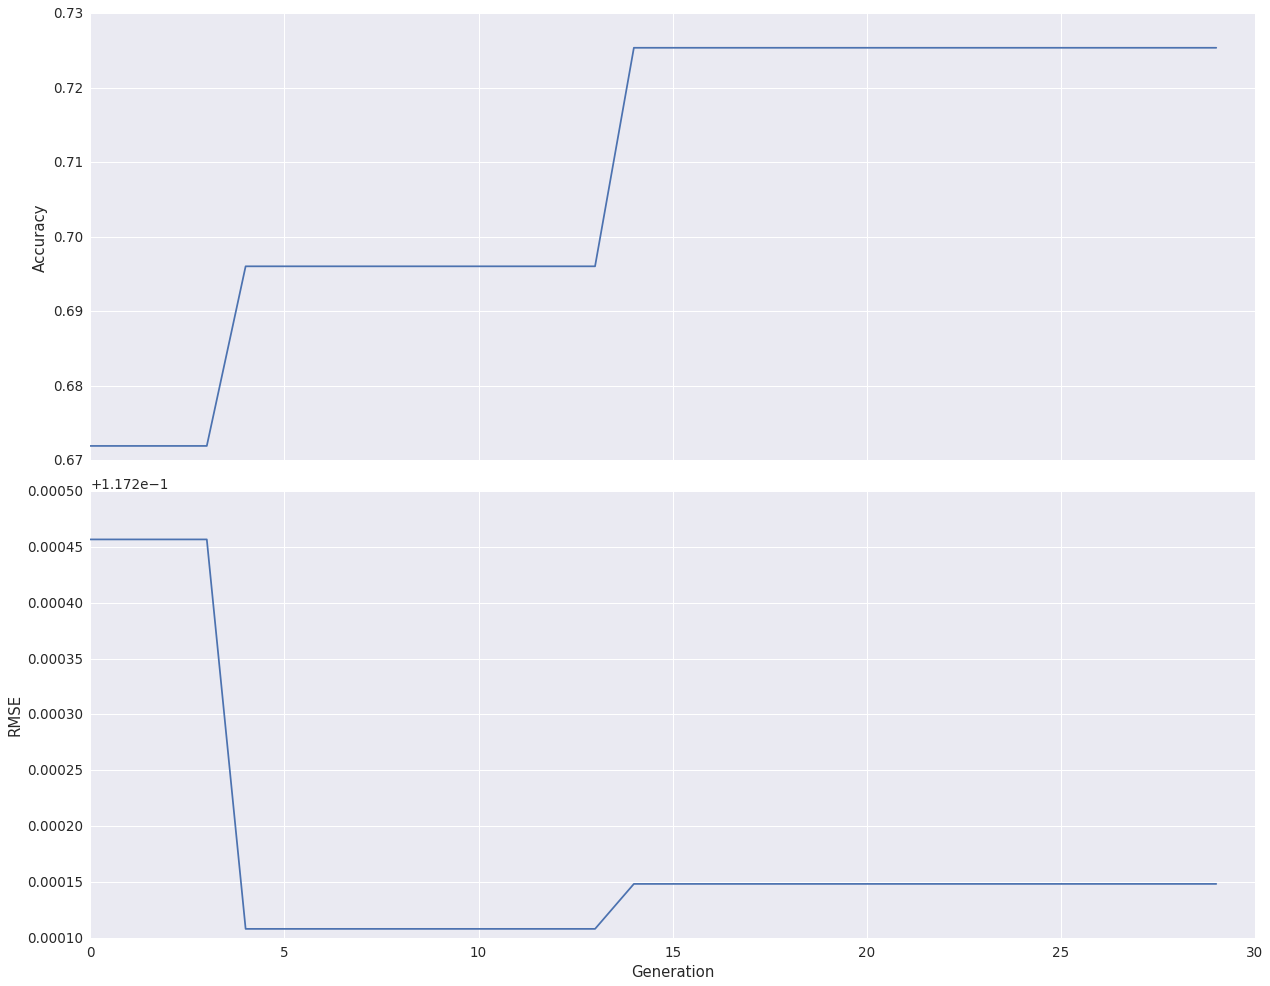

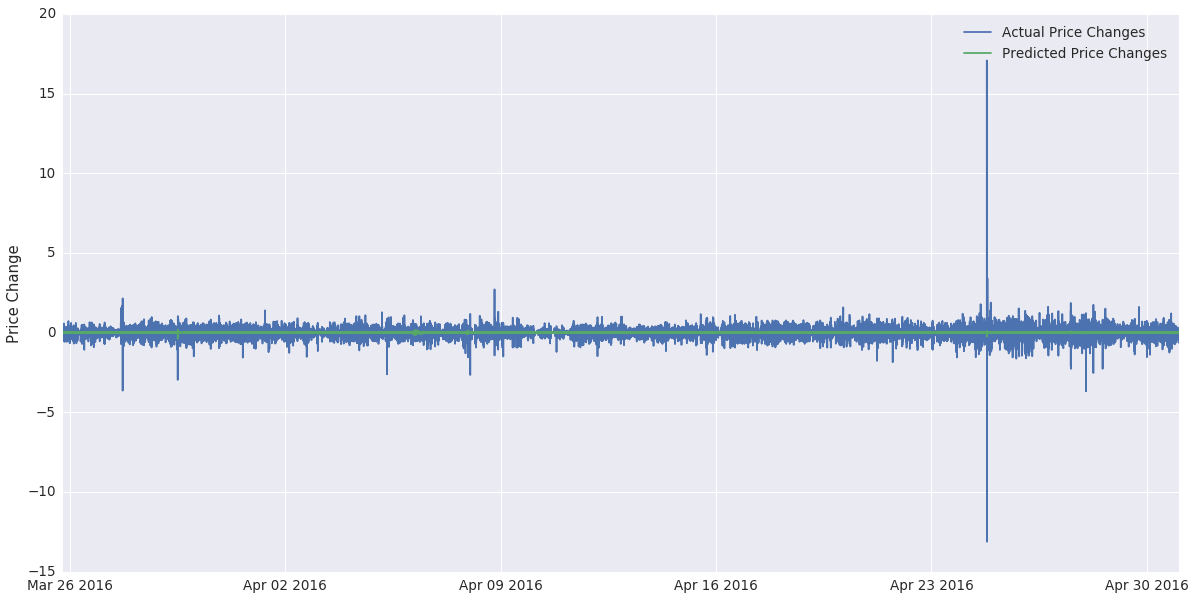

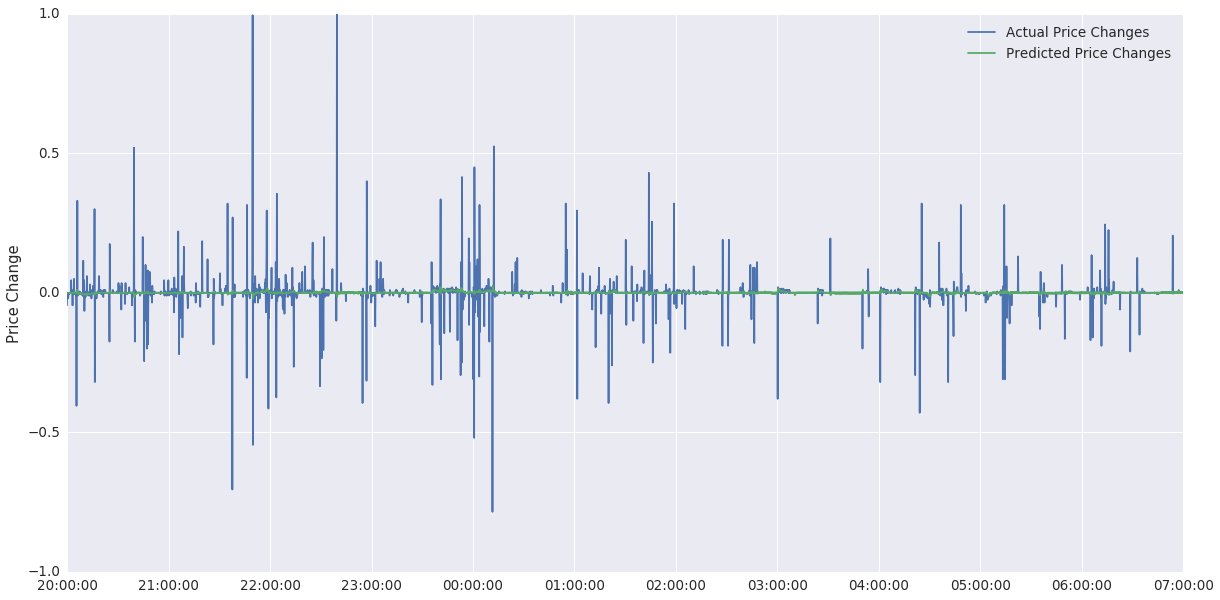

In [43]:
features = ['B-ASPREAD', 'K360', 'K180',
            'MOM60', 'ROC60', 'LWR360',
            'LWR180', 'ADOSC360', 'ADOSC180',
            'DISP360', 'DISP180', 'DISP60',
            'OSCP60-180', 'RSI60']

evaluate(data10s.copy(), features)

/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Scores [[ 0.59124655  0.19294357]
 [ 0.59124655  0.19294357]
 [ 0.59245511  0.19326252]
 [ 0.59446938  0.19309603]
 [ 0.59446938  0.19309603]
 [ 0.60842541  0.19332101]
 [ 0.60842541  0.19332101]
 [ 0.61161948  0.19308534]
 [ 0.61161948  0.19308534]
 [ 0.61855433  0.19311111]
 [ 0.61855433  0.19311111]
 [ 0.61855433  0.19311111]
 [ 0.61855433  0.19311111]
 [ 0.61855433  0.19311111]
 [ 0.62433817  0.19287268]
 [ 0.62433817  0.19287268]
 [ 0.62433817  0.19287268]
 [ 0.62433817  0.19287268]
 [ 0.62433817  0.19287268]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]
 [ 0.65475368  0.19308639]] 

Chromosome:  [0.004964715421691506, 0.0052275162993543085] 



Results

Training set R2:  -0.000956259733761 , Test set R2:  0.00123699134534
Training set RMSE:  0.175710708362 , T

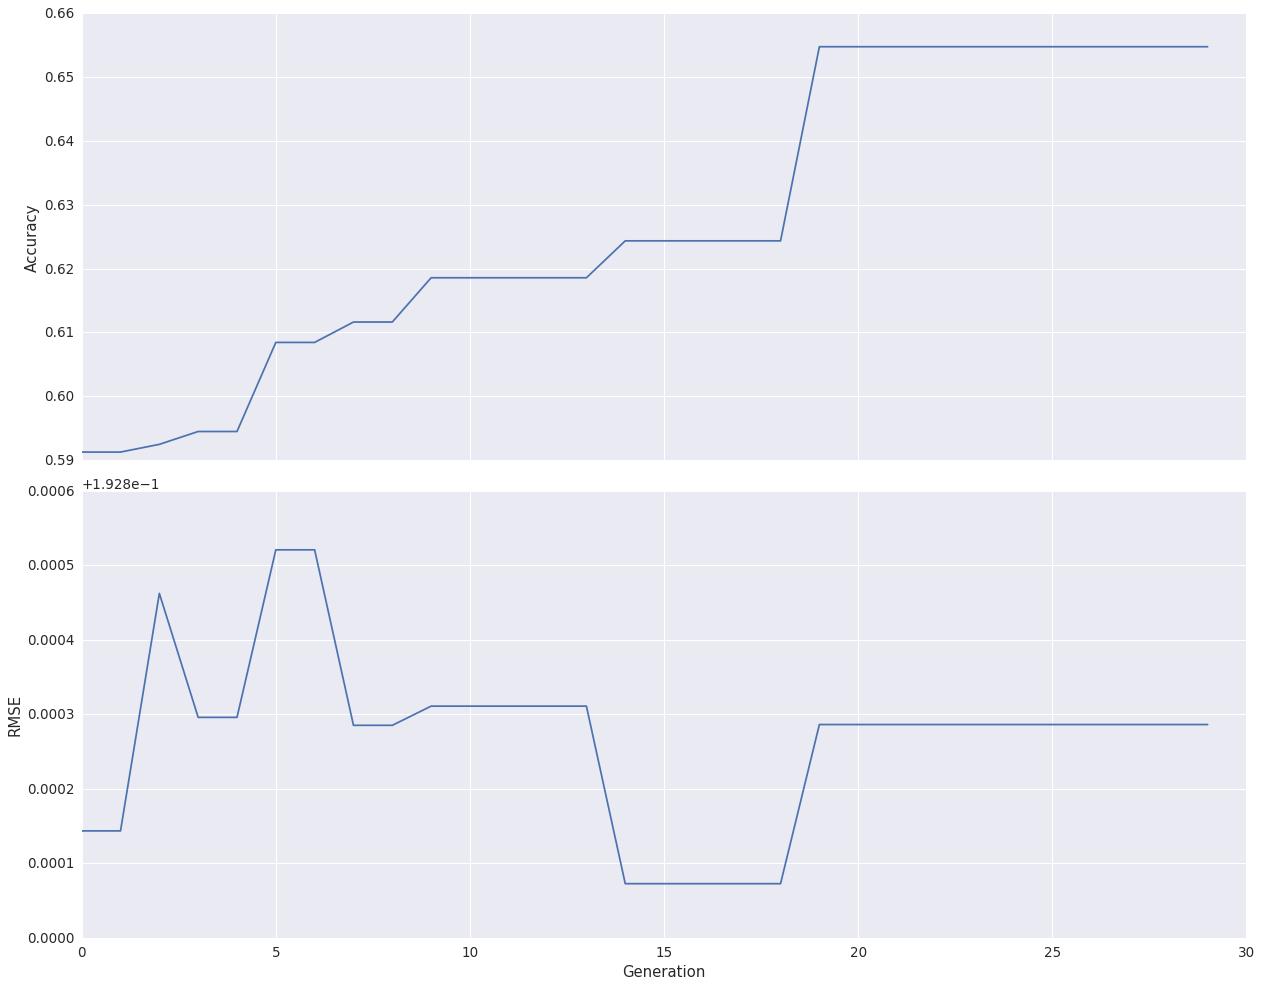

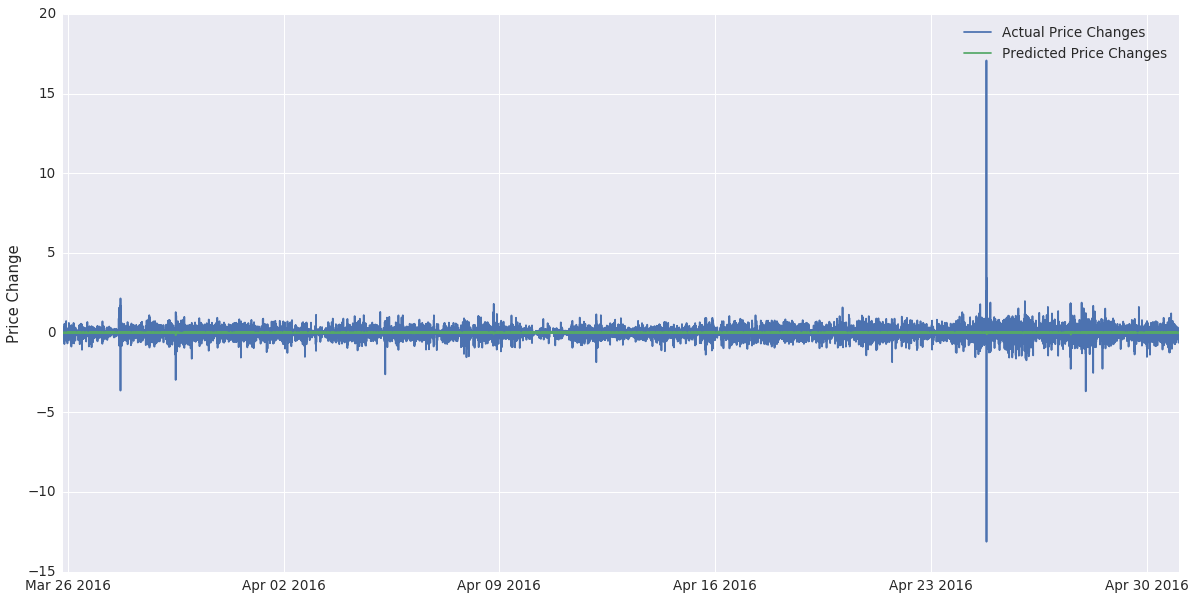

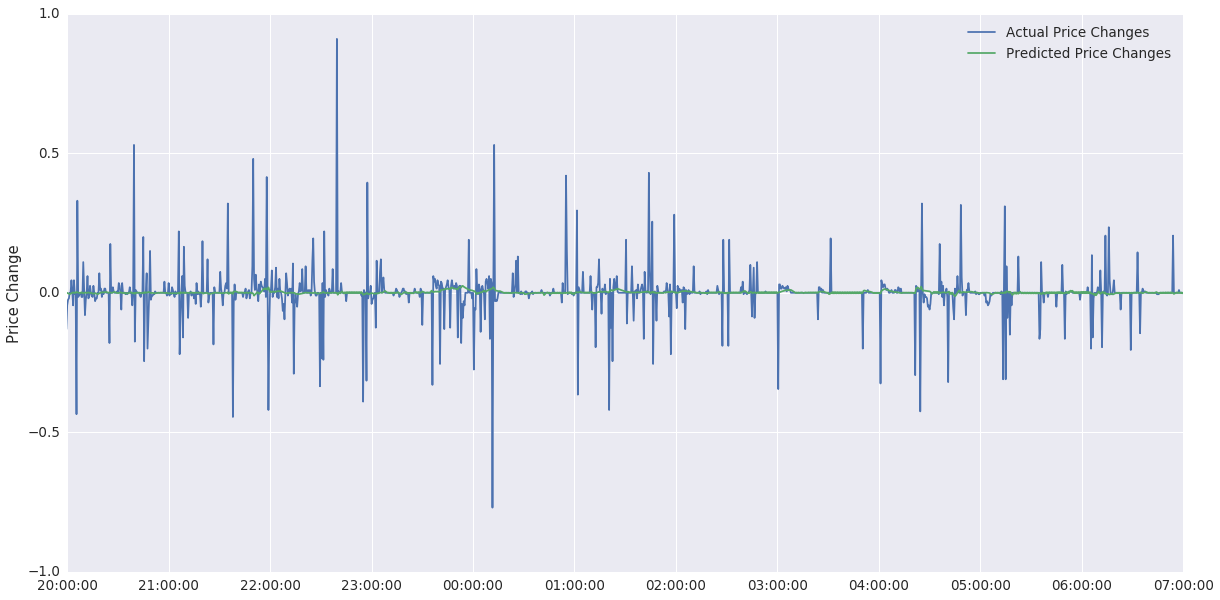

In [44]:
features = ['B-ASPREAD', 'K360', 'K180', 'K60', 'MOM60', 'ROC60',
            'LWR360', 'LWR180', 'LWR60', 'ADOSC360', 'ADOSC180',
            'ADOSC60', 'DISP360', 'RSI60'] 

evaluate(data30s.copy(), features)

/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Scores [[ 0.55542085  0.25995059]
 [ 0.57152754  0.25990622]
 [ 0.57325944  0.25980006]
 [ 0.58157257  0.26032052]
 [ 0.58157257  0.26032052]
 [ 0.58157257  0.26032052]
 [ 0.58157257  0.26032052]
 [ 0.58157257  0.26032052]
 [ 0.58157257  0.26032052]
 [ 0.59144441  0.25995476]
 [ 0.59144441  0.25995476]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]
 [ 0.60264404  0.26004393]] 

Chromosome:  [0.009462480686286218, 0.007575133699983841] 



Results

Training set R2:  -0.00600352186874 , Test set R2:  -0.00245442996566
Training set RMSE:  0.235230057465 , Te

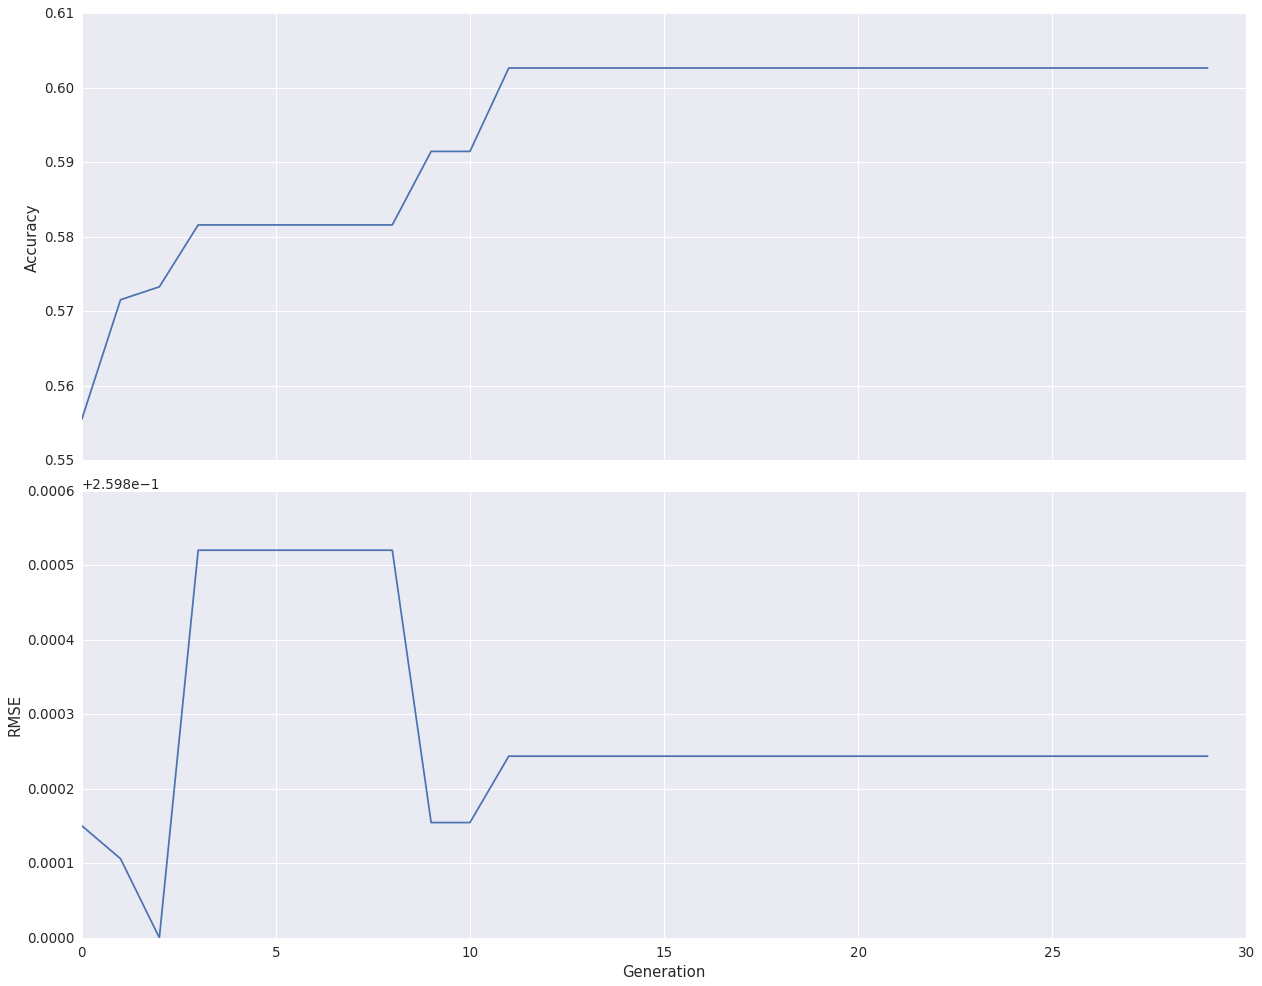

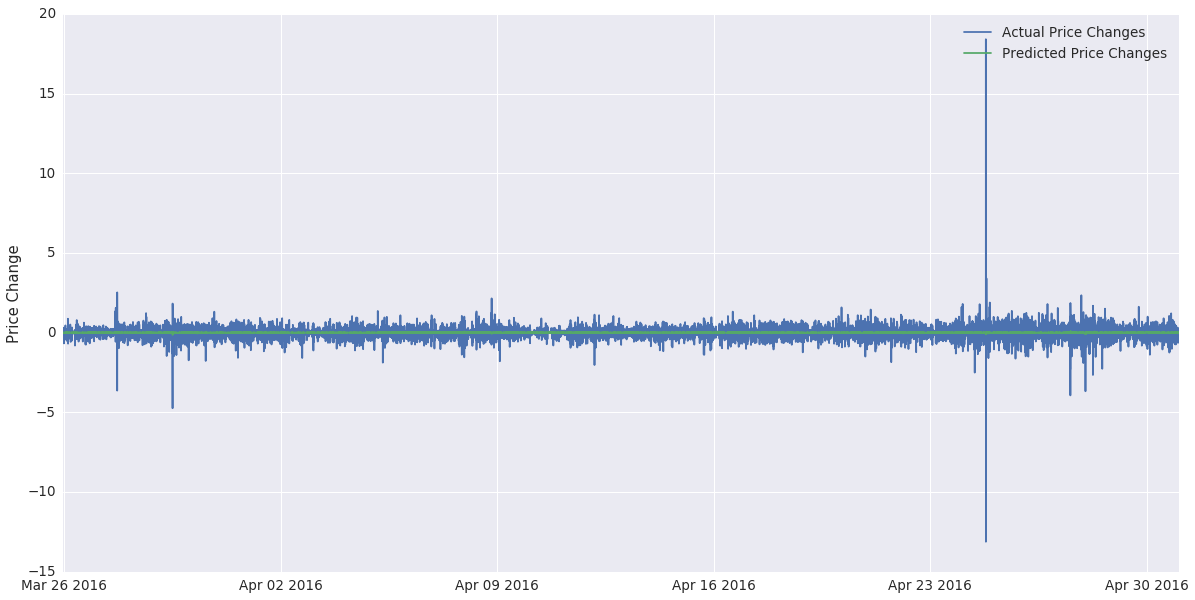

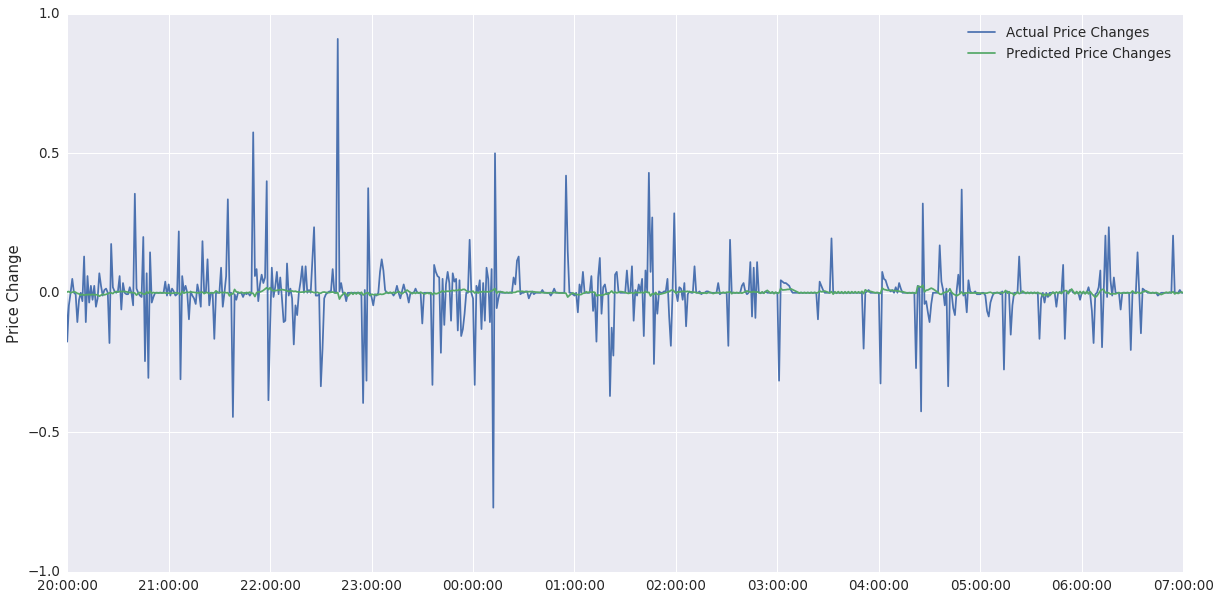

In [45]:
features = ['B-ASPREAD', 'K360', 'K180', 'K60', 'MOM180', 'MOM60', 'ROC360',
            'ROC60', 'LWR360', 'LWR180', 'LWR60', 'ADOSC360',
            'ADOSC180', 'ADOSC60', 'DISP360', 'OSCP180-360', 'RSI60']

evaluate(data1m, features)

/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Scores [[ 0.54973357  0.522441  ]
 [ 0.54973357  0.522441  ]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5509177   0.52264192]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]
 [ 0.5526939   0.52285964]] 

Chromosome:  [0.00592096297658989, 0.00911291745753688] 



Results

Training set R2:  -0.0247514107101 , Test set R2:  -0.0050835736334
Training set RMSE:  0.48855769757 , Test se

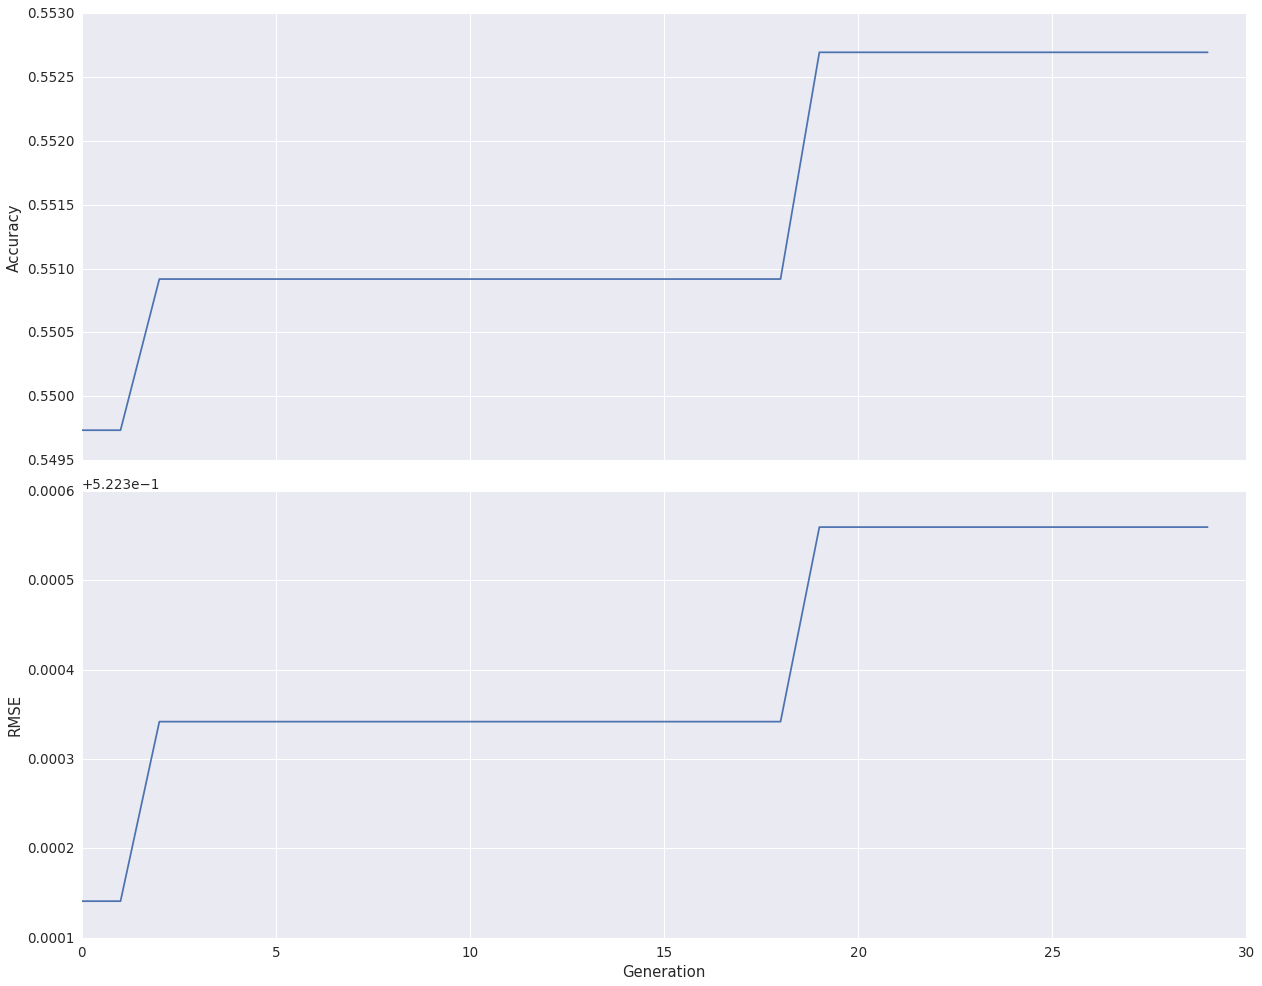

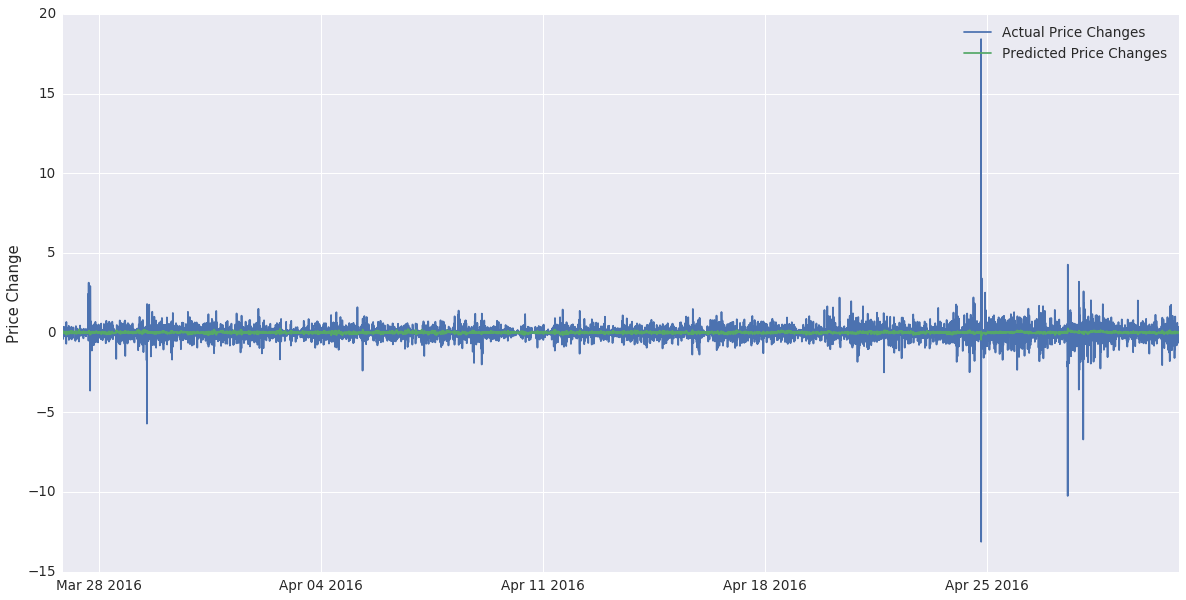

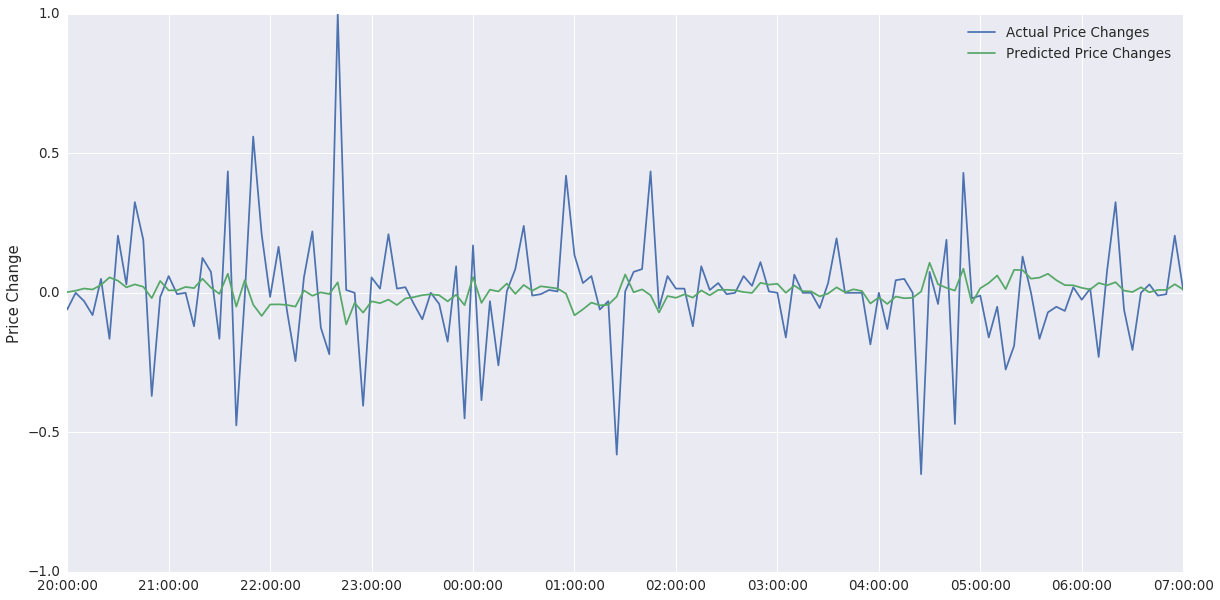

In [48]:
features = data5m.drop(['mid price', 'DELTAP'], axis = 1).columns 

evaluate(data5m.copy(), features)

/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dl3913/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Scores [[ 0.57125382  0.62500629]
 [ 0.57981651  0.62210199]
 [ 0.58409786  0.62412483]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]
 [ 0.58470948  0.62280566]] 

Chromosome:  [0.004794906735045824, 0.009197101463071388] 



Results

Training set R2:  -0.0155125782698 , Test set R2:  -0.00602545099593
Training set RMSE:  0.646462943262 , Tes

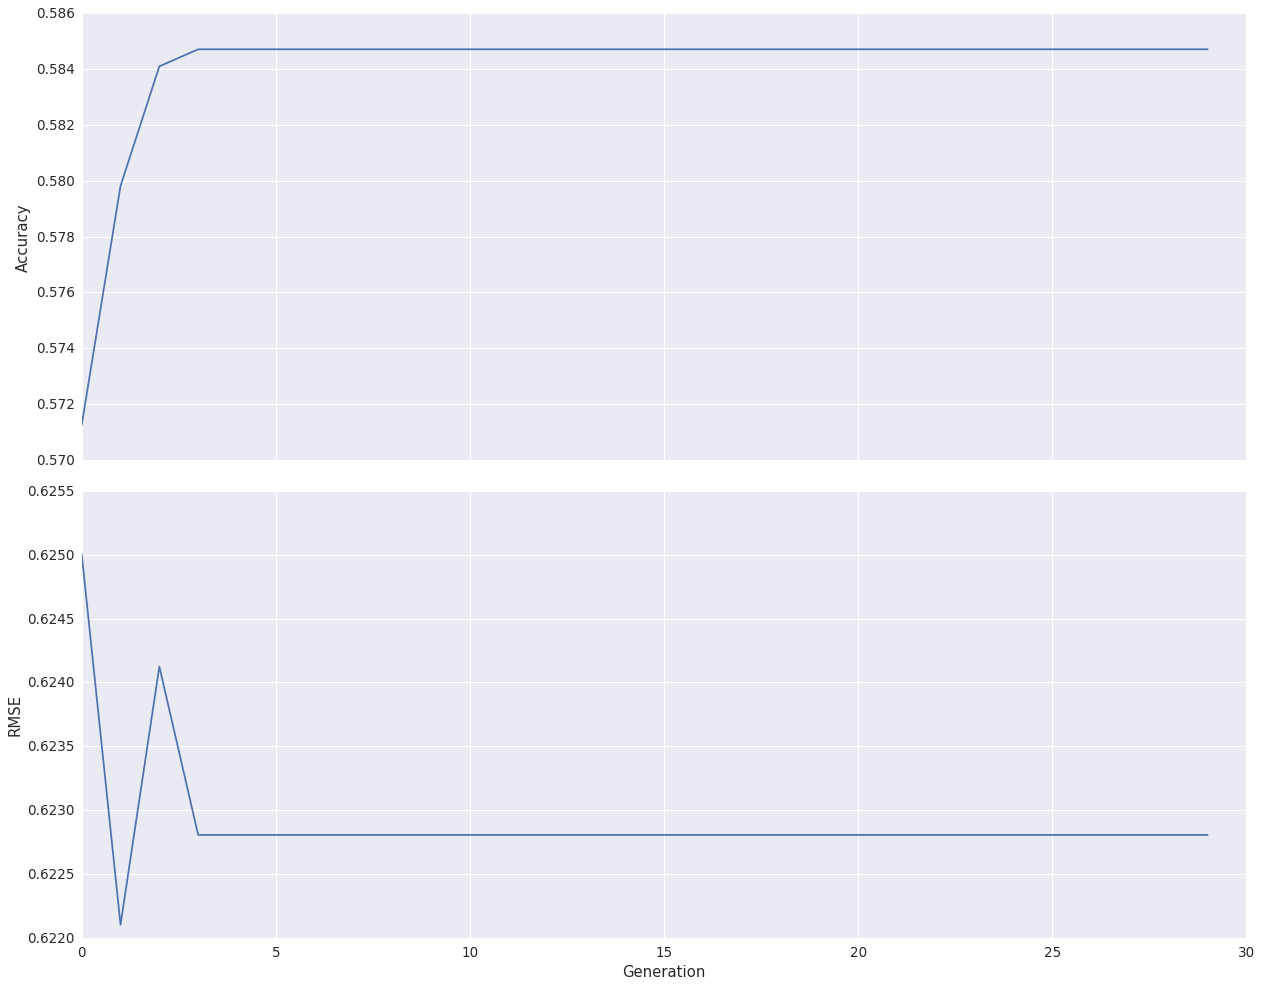

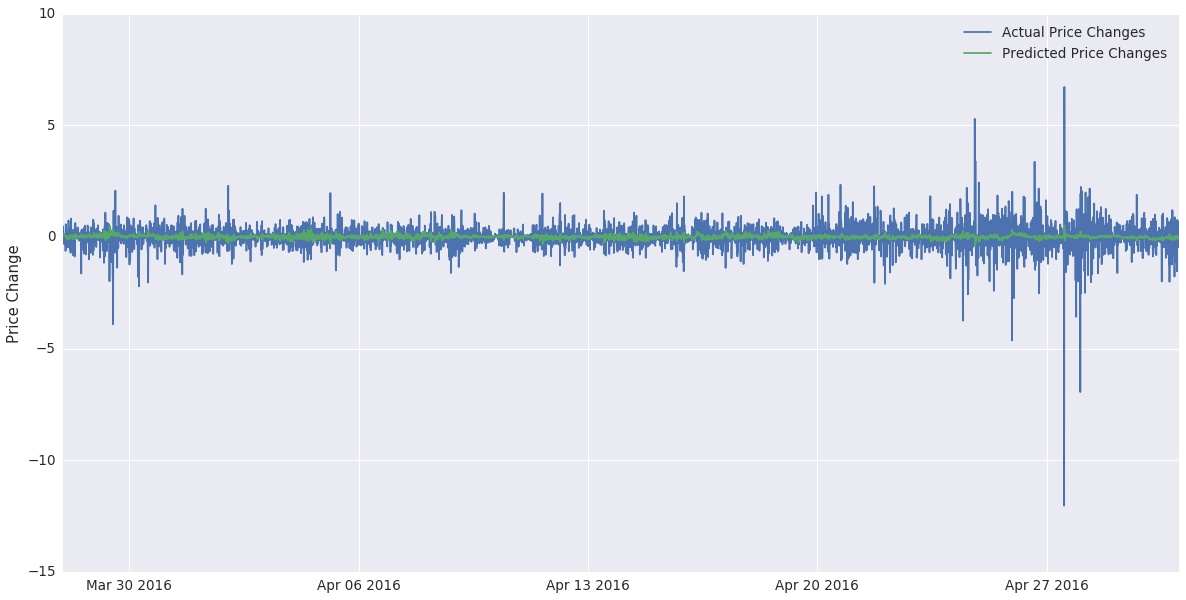

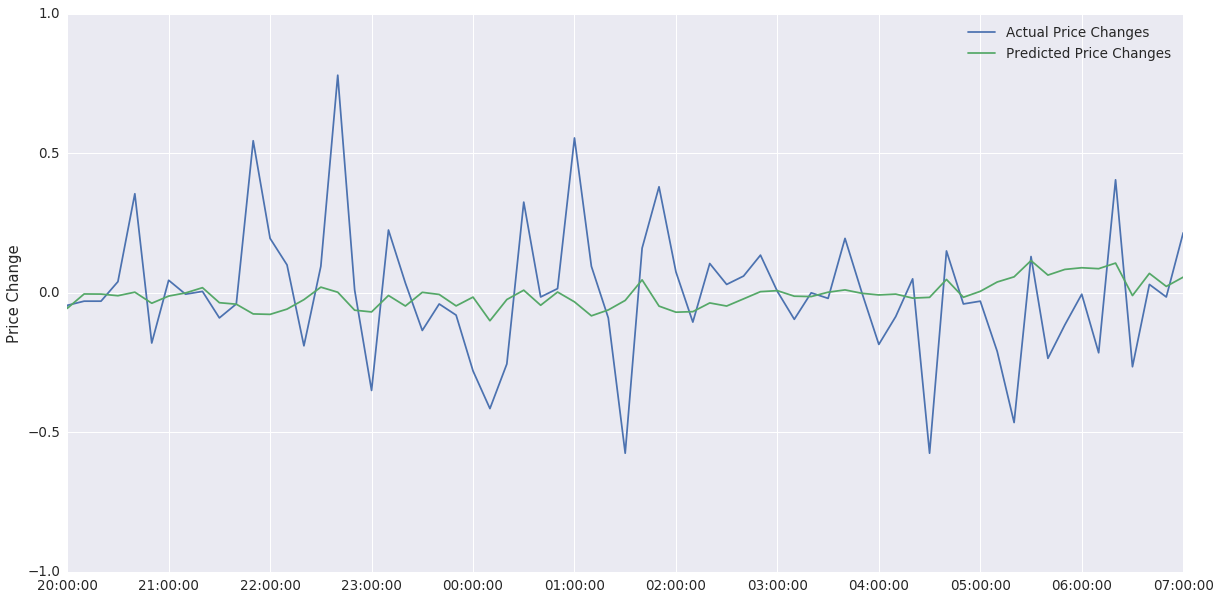

In [47]:
features = data10m.drop(['mid price', 'DELTAP'], axis = 1).columns 

evaluate(data10m.copy(), features)